In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
pd.set_option("display.max_rows", None, "display.max_columns", None)        #To display the full table

In [2]:
train_data = pd.read_csv('train.csv')
Xtest = pd.read_csv('test.csv')
#Ytest = pd.read_csv('sample_submission.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
Xtest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
Xtrain = train_data.drop(['SalePrice'],axis='columns')
Ytrain = train_data['SalePrice']

In [6]:
Xtrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [7]:
#Number of times a class appears in the given column
Xtrain['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

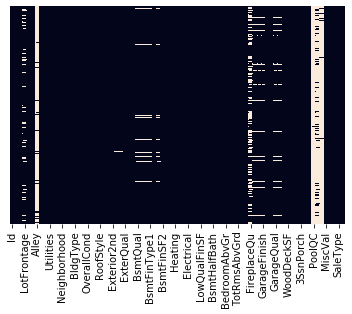

In [8]:
#Creating a heatmap of null values
sns.heatmap(Xtrain.isnull(),yticklabels=False,cbar=False)

In [9]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
Numerics = LabelEncoder()

In [11]:
#Converting the non-numeric/string based columns into a 
#numeric form with distinct values
Xtrain_n = Xtrain.copy()
Xtrain_n.fillna('0',inplace=True)                  #filling up all null values
Xtrain_n['MSZoning_n'] = Numerics.fit_transform(Xtrain_n['MSZoning'])
Xtrain_n['Street_n'] = Numerics.fit_transform(Xtrain_n['Street'])
Xtrain_n['LotShape_n'] = Numerics.fit_transform(Xtrain_n['LotShape'])
Xtrain_n['LotConfig_n'] = Numerics.fit_transform(Xtrain_n['LotConfig'])
Xtrain_n['LandSlope_n'] = Numerics.fit_transform(Xtrain_n['LandSlope'])
Xtrain_n['Neighborhood_n'] = Numerics.fit_transform(Xtrain_n['Neighborhood'])
Xtrain_n['Condition1_n'] = Numerics.fit_transform(Xtrain_n['Condition1'])
Xtrain_n['Condition2_n'] = Numerics.fit_transform(Xtrain_n['Condition2'])
Xtrain_n['BldgType_n'] = Numerics.fit_transform(Xtrain_n['BldgType'])
Xtrain_n['HouseStyle_n'] = Numerics.fit_transform(Xtrain_n['HouseStyle'])


Xtrain_n = Xtrain_n.drop(['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle'],axis='columns')

In [12]:
#Better option for filling of null values is to insert the
#mean of the column.
#Ex.
#Xtrain['LotFrontage'] = Xtrain['LotFrontage'].fillna(Xtrain['LotFrontage'].mean())

In [13]:
Xtrain_n['RoofStyle_n'] = Numerics.fit_transform(Xtrain_n['RoofStyle'])
Xtrain_n['RoofMatl_n'] = Numerics.fit_transform(Xtrain_n['RoofMatl'])
Xtrain_n['Exterior1st_n'] = Numerics.fit_transform(Xtrain_n['Exterior1st'])
Xtrain_n['Exterior2nd_n'] = Numerics.fit_transform(Xtrain_n['Exterior2nd'])
Xtrain_n['ExterQual_n'] = Numerics.fit_transform(Xtrain_n['ExterQual'])
Xtrain_n['ExterCond_n'] = Numerics.fit_transform(Xtrain_n['ExterCond'])
Xtrain_n['Foundation_n'] = Numerics.fit_transform(Xtrain_n['Foundation'])

Xtrain_n = Xtrain_n.drop(['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation'],axis='columns')

In [14]:
Xtrain_n['MasVnrType_n'] = Numerics.fit_transform(Xtrain_n['MasVnrType'])
Xtrain_n['BsmtQual_n'] = Numerics.fit_transform(Xtrain_n['BsmtQual'])
Xtrain_n['BsmtCond_n'] = Numerics.fit_transform(Xtrain_n['BsmtCond'])
Xtrain_n['BsmtExposure_n'] = Numerics.fit_transform(Xtrain_n['BsmtExposure'])
Xtrain_n['BsmtFinType1_n'] = Numerics.fit_transform(Xtrain_n['BsmtFinType1'])
Xtrain_n['BsmtFinType2_n'] = Numerics.fit_transform(Xtrain_n['BsmtFinType2'])
Xtrain_n['Heating_n'] = Numerics.fit_transform(Xtrain_n['Heating'])
Xtrain_n['HeatingQC_n'] = Numerics.fit_transform(Xtrain_n['HeatingQC'])
Xtrain_n['CentralAir_n'] = Numerics.fit_transform(Xtrain_n['CentralAir'])
Xtrain_n['Electrical_n'] = Numerics.fit_transform(Xtrain_n['Electrical'])
Xtrain_n['KitchenQual_n'] = Numerics.fit_transform(Xtrain_n['KitchenQual'])
Xtrain_n['Functional_n'] = Numerics.fit_transform(Xtrain_n['Functional'])
Xtrain_n['FireplaceQu_n'] = Numerics.fit_transform(Xtrain_n['FireplaceQu'])
Xtrain_n['GarageType_n'] = Numerics.fit_transform(Xtrain_n['GarageType'])
Xtrain_n['GarageFinish_n'] = Numerics.fit_transform(Xtrain_n['GarageFinish'])
Xtrain_n['GarageQual_n'] = Numerics.fit_transform(Xtrain_n['GarageQual'])
Xtrain_n['GarageCond_n'] = Numerics.fit_transform(Xtrain_n['GarageCond'])
Xtrain_n['PavedDrive_n'] = Numerics.fit_transform(Xtrain_n['PavedDrive'])
Xtrain_n['Fence_n'] = Numerics.fit_transform(Xtrain_n['Fence'])
Xtrain_n['YrSold_n'] = Numerics.fit_transform(Xtrain_n['YrSold'])
Xtrain_n['SaleType_n'] = Numerics.fit_transform(Xtrain_n['SaleType'])
Xtrain_n['SaleCondition_n'] = Numerics.fit_transform(Xtrain_n['SaleCondition'])


Xtrain_n = Xtrain_n.drop(['PoolQC','Fence','MiscFeature','YrSold','SaleType','SaleCondition','PoolArea'],axis='columns')
Xtrain_n = Xtrain_n.drop(['FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive'],axis='columns')
Xtrain_n = Xtrain_n.drop(['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1'],axis='columns')
Xtrain_n = Xtrain_n.drop(['BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional'],axis='columns')

In [15]:
Xtrain_n.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,MSZoning_n,Street_n,LotShape_n,LotConfig_n,LandSlope_n,Neighborhood_n,Condition1_n,Condition2_n,BldgType_n,HouseStyle_n,RoofStyle_n,RoofMatl_n,Exterior1st_n,Exterior2nd_n,ExterQual_n,ExterCond_n,Foundation_n,MasVnrType_n,BsmtQual_n,BsmtCond_n,BsmtExposure_n,BsmtFinType1_n,BsmtFinType2_n,Heating_n,HeatingQC_n,CentralAir_n,Electrical_n,KitchenQual_n,Functional_n,FireplaceQu_n,GarageType_n,GarageFinish_n,GarageQual_n,GarageCond_n,PavedDrive_n,Fence_n,YrSold_n,SaleType_n,SaleCondition_n
0,1,60,65,8450,7,5,2003,2003,196,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,2,3,1,3,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,4,4,3,6,1,0,1,5,2,6,0,2,2,5,5,2,0,2,8,4
1,2,20,80,9600,6,8,1976,1976,0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,5,3,1,3,2,0,24,1,2,0,2,1,1,8,8,3,4,1,3,3,4,2,1,6,1,0,1,5,3,6,5,2,2,5,5,2,0,1,8,4
2,3,60,68,11250,7,5,2001,2002,162,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,9,3,1,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,4,3,3,6,1,0,1,5,2,6,5,2,2,5,5,2,0,2,8,4
3,4,70,60,9550,7,5,1915,1970,0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998,3,642,0,35,272,0,0,0,2,3,1,0,0,0,6,2,2,0,5,1,1,13,15,3,4,0,3,4,2,4,1,6,1,2,1,5,2,6,3,6,3,5,5,2,0,0,8,0
4,5,60,84,14260,8,5,2000,2000,350,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,12,3,1,0,2,0,15,2,2,0,5,1,1,12,13,2,4,2,2,3,4,1,3,6,1,0,1,5,2,6,5,2,2,5,5,2,0,2,8,4


In [16]:
#Final check of null values
Xtrain_n.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage        0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
MiscVal            0
MoSold             0
MSZoning_n         0
Street_n           0
LotShape_n         0
LotConfig_n        0
LandSlope_n        0
Neighborhood_n     0
Condition1_n       0
Condition2_n       0
BldgType_n         0
HouseStyle_n       0
RoofStyle_n        0
RoofMatl_n         0
Exterior1st_n

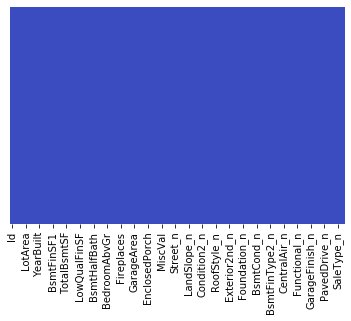

In [17]:
#'coolwarm' makes it blue with red dots.
sns.heatmap(Xtrain_n.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [18]:
#To drop columns filled entirely with null values
Xtrain_n.dropna(inplace=True)

In [19]:
model = LinearRegression()

In [20]:
Xtrain_n.shape

(1460, 74)

In [21]:
model.fit(Xtrain_n,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
train_predict = model.predict(Xtrain_n)

In [72]:
model.score(Xtrain_n,Ytrain)

0.8483088542293946

In [23]:
from sklearn import metrics

In [24]:
metrics.mean_absolute_error(Ytrain, train_predict)

18524.393857837567

In [25]:
metrics.mean_squared_error(Ytrain, train_predict)

956683986.6446109

In [26]:
#Cannot predict test 'cause the columns need to be changed

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Xtrain_n)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
X_poly.shape

(1460, 2850)

In [30]:
#Perfect! Small error
a = pol_reg.predict(X_poly)
metrics.mean_squared_error(Ytrain,a)

4.1728994459390284e-10

In [31]:
Xtest_n = Xtest
Xtest_n.fillna('0',inplace=True)
Xtest_n['MSZoning_n'] = Numerics.fit_transform(Xtest_n['MSZoning'])
Xtest_n['Street_n'] = Numerics.fit_transform(Xtest_n['Street'])
Xtest_n['LotShape_n'] = Numerics.fit_transform(Xtest_n['LotShape'])
Xtest_n['LotConfig_n'] = Numerics.fit_transform(Xtest_n['LotConfig'])
Xtest_n['LandSlope_n'] = Numerics.fit_transform(Xtest_n['LandSlope'])
Xtest_n['Neighborhood_n'] = Numerics.fit_transform(Xtest_n['Neighborhood'])
Xtest_n['Condition1_n'] = Numerics.fit_transform(Xtest_n['Condition1'])
Xtest_n['Condition2_n'] = Numerics.fit_transform(Xtest_n['Condition2'])
Xtest_n['BldgType_n'] = Numerics.fit_transform(Xtest_n['BldgType'])
Xtest_n['HouseStyle_n'] = Numerics.fit_transform(Xtest_n['HouseStyle'])


Xtest_n = Xtest_n.drop(['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle'],axis='columns')

Xtest_n['RoofStyle_n'] = Numerics.fit_transform(Xtest_n['RoofStyle'])
Xtest_n['RoofMatl_n'] = Numerics.fit_transform(Xtest_n['RoofMatl'])
Xtest_n['Exterior1st_n'] = Numerics.fit_transform(Xtest_n['Exterior1st'])
Xtest_n['Exterior2nd_n'] = Numerics.fit_transform(Xtest_n['Exterior2nd'])
Xtest_n['ExterQual_n'] = Numerics.fit_transform(Xtest_n['ExterQual'])
Xtest_n['ExterCond_n'] = Numerics.fit_transform(Xtest_n['ExterCond'])
Xtest_n['Foundation_n'] = Numerics.fit_transform(Xtest_n['Foundation'])

Xtest_n = Xtest_n.drop(['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation'],axis='columns')

Xtest_n.fillna('0',inplace=True)                  #filling up all null values
Xtest_n['MasVnrType_n'] = Numerics.fit_transform(Xtest_n['MasVnrType'])
Xtest_n['BsmtQual_n'] = Numerics.fit_transform(Xtest_n['BsmtQual'])
Xtest_n['BsmtCond_n'] = Numerics.fit_transform(Xtest_n['BsmtCond'])
Xtest_n['BsmtExposure_n'] = Numerics.fit_transform(Xtest_n['BsmtExposure'])
Xtest_n['BsmtFinType1_n'] = Numerics.fit_transform(Xtest_n['BsmtFinType1'])
Xtest_n['BsmtFinType2_n'] = Numerics.fit_transform(Xtest_n['BsmtFinType2'])
Xtest_n['Heating_n'] = Numerics.fit_transform(Xtest_n['Heating'])
Xtest_n['HeatingQC_n'] = Numerics.fit_transform(Xtest_n['HeatingQC'])
Xtest_n['CentralAir_n'] = Numerics.fit_transform(Xtest_n['CentralAir'])
Xtest_n['Electrical_n'] = Numerics.fit_transform(Xtest_n['Electrical'])
Xtest_n['KitchenQual_n'] = Numerics.fit_transform(Xtest_n['KitchenQual'])
Xtest_n['Functional_n'] = Numerics.fit_transform(Xtest_n['Functional'])
Xtest_n['FireplaceQu_n'] = Numerics.fit_transform(Xtest_n['FireplaceQu'])
Xtest_n['GarageType_n'] = Numerics.fit_transform(Xtest_n['GarageType'])
Xtest_n['GarageFinish_n'] = Numerics.fit_transform(Xtest_n['GarageFinish'])
Xtest_n['GarageQual_n'] = Numerics.fit_transform(Xtest_n['GarageQual'])
Xtest_n['GarageCond_n'] = Numerics.fit_transform(Xtest_n['GarageCond'])
Xtest_n['PavedDrive_n'] = Numerics.fit_transform(Xtest_n['PavedDrive'])
Xtest_n['Fence_n'] = Numerics.fit_transform(Xtest_n['Fence'])
Xtest_n['YrSold_n'] = Numerics.fit_transform(Xtest_n['YrSold'])
Xtest_n['SaleType_n'] = Numerics.fit_transform(Xtest_n['SaleType'])
Xtest_n['SaleCondition_n'] = Numerics.fit_transform(Xtest_n['SaleCondition'])


Xtest_n = Xtest_n.drop(['PoolQC','Fence','MiscFeature','YrSold','SaleType','SaleCondition','PoolArea'],axis='columns')
Xtest_n = Xtest_n.drop(['FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive'],axis='columns')
Xtest_n = Xtest_n.drop(['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1'],axis='columns')
Xtest_n = Xtest_n.drop(['BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional'],axis='columns')

In [32]:
Xtest_n.shape,Xtrain_n.shape

((1459, 74), (1460, 74))

In [33]:
X1_poly = poly_reg.fit_transform(Xtest_n)

In [34]:
X1_poly.shape

(1459, 2850)

In [35]:
predict_test = pol_reg.predict(X1_poly)
#metrics.mean_squared_error(Ytest,b)

In [36]:
predict_test

array([   55410.33839541, -3006513.01101625,  -235459.75530881, ...,
         -17511.85910662,  -486779.16247177,   136281.06504527])

In [37]:
try1 = np.abs(predict_test)

In [38]:
np.savetxt("Price_predict.csv", try1, delimiter=",")

In [40]:
from sklearn.linear_model import SGDRegressor

In [228]:
clf = SGDRegressor()

In [229]:
clf.fit(Xtrain_n,Ytrain)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [230]:
clf.predict(Xtrain_n)

array([-4.39955181e+16, -5.82435029e+16, -5.82868498e+16, ...,
       -3.87700400e+16, -6.22018598e+16, -6.53999781e+16])

In [231]:
try2=clf.predict(Xtest_n)

In [232]:
try2

array([-6.52414650e+16, -7.32745034e+16, -7.66495913e+16, ...,
       -1.20054928e+17, -5.28529878e+16, -5.11407403e+16])

In [46]:
np.savetxt("Price_predict(1).csv",try2, delimiter=",")

In [47]:
try2.shape

(1459,)

In [50]:
import sklearn.neural_network as nn

In [220]:
regr = nn.MLPRegressor(max_iter=2000,random_state=5)

In [221]:
regr.fit(Xtrain_n,Ytrain)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=5, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [224]:
predict_nn = regr.predict(Xtrain_n)

In [225]:
regr.score(Xtrain_n,Ytrain)

0.803878916587122

In [226]:
metrics.mean_absolute_error(Ytrain, predict_nn)

23508.225079490025

In [227]:
metrics.mean_squared_error(Ytrain, predict_nn)

1236894210.2146769

In [233]:
try3 = regr.predict(Xtest_n)

In [234]:
np.savetxt("Price_predict(1).csv",try3, delimiter=",")